In [93]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
plt.tight_layout()
sns.set_style("white")
%matplotlib inline
PATH = "/Users/M/Google_Drive/Scripts/hs/worm/EMBO/writeup/Figures/fig3_total/unique/"

os.chdir(PATH)

# Get columns of total from HS, OK, sense and antisense

In [94]:
df_HS_S = pd.read_csv(PATH + "hs/Rsubread_senseunique_normalized_rRNA_star.txt",sep="\t").rename(columns={"X.BAMS.N2WT_INP_.bam":"TOTAL_WT_S","X.BAMS.N2HS_INP_.bam":"TOTAL_HS_S"})
df_OK_S = pd.read_csv(PATH + "ok/Rsubread_senseunique_normalized_rRNA_star.txt",sep="\t").rename(columns={"X.BAMS.OK803.INP__.bam":"TOTAL_OK_S"})
df_HS_A = pd.read_csv(PATH + "hs/Rsubread_antisenseunique_normalized_rRNA_star.txt",sep="\t").rename(columns={"X.BAMS.N2WT_INP_.bam":"TOTAL_WT_A","X.BAMS.N2HS_INP_.bam":"TOTAL_HS_A"})
df_OK_A = pd.read_csv(PATH + "ok/Rsubread_antisenseunique_normalized_rRNA_star.txt",sep="\t").rename(columns={"X.BAMS.OK803.INP__.bam":"TOTAL_OK_A"})

In [95]:
dfWT = df_HS_S[ ['GeneID', 'TOTAL_WT_S']].copy()
dfHS = df_HS_S[ ['GeneID', 'TOTAL_HS_S']].copy()
dfOK = df_OK_S[ ['GeneID', 'TOTAL_OK_S']].copy()
dfWT["TOTAL_WT_A"] = df_HS_A["TOTAL_WT_A"]
dfHS["TOTAL_HS_A"] = df_HS_A["TOTAL_HS_A"]
dfOK["TOTAL_OK_A"] = df_OK_A["TOTAL_OK_A"]





df_HS = pd.merge(dfWT,dfHS,on="GeneID")
df_HS.index = df_HS["GeneID"]
df_OK = pd.merge(dfWT,dfOK,on="GeneID")
df_OK.index = df_OK["GeneID"]


df_raw_counts = pd.merge(df_HS,df_OK,on="GeneID")
df_raw_counts.head()

,GeneID,TOTAL_WT_S_x,TOTAL_WT_A_x,TOTAL_HS_S,TOTAL_HS_A,TOTAL_WT_S_y,TOTAL_WT_A_y,TOTAL_OK_S,TOTAL_OK_A
0,WBGene00014450,36,1,2,1,36,1,1,1
1,WBGene00014451,62,1,2,1,62,1,12,1
2,WBGene00010957,2847,27,12,2,2847,27,5571,19
3,WBGene00010958,1856,22,15,1,1856,22,2445,16
4,WBGene00014452,41,3,2,1,41,3,34,4


In [96]:
del df_HS["GeneID"]
del df_OK["GeneID"]

df_HS['mean'] = df_HS.mean(axis=1)
df_OK["mean"] = df_OK.mean(axis=1)

df_raw_counts.head()

,GeneID,TOTAL_WT_S_x,TOTAL_WT_A_x,TOTAL_HS_S,TOTAL_HS_A,TOTAL_WT_S_y,TOTAL_WT_A_y,TOTAL_OK_S,TOTAL_OK_A
0,WBGene00014450,36,1,2,1,36,1,1,1
1,WBGene00014451,62,1,2,1,62,1,12,1
2,WBGene00010957,2847,27,12,2,2847,27,5571,19
3,WBGene00010958,1856,22,15,1,1856,22,2445,16
4,WBGene00014452,41,3,2,1,41,3,34,4


In [97]:
df_HS["GeneID"] = df_HS.index
df_OK["GeneID"] = df_OK.index



df_HS["WT % Antisense over Sense"] = df_HS["TOTAL_WT_A"] / df_HS["TOTAL_WT_S"]
df_OK["WT % Antisense over Sense"] = df_OK["TOTAL_WT_A"] / df_OK["TOTAL_WT_S"]
df_HS["HS % Antisense over Sense"] = df_HS["TOTAL_HS_A"] / df_HS["TOTAL_HS_S"]
df_OK["OK % Antisense over Sense"] = df_OK["TOTAL_OK_A"] / df_OK["TOTAL_OK_S"]

#Make sure columns have atleast this much in one
NUM = 20
print(len(df_HS))
print(len(df_OK))


df_HS = df_HS[ df_HS['mean']> NUM]
df_OK = df_OK[ df_OK['mean']> NUM]                           
print(len(df_HS))
print(len(df_OK))

df_over20 = pd.merge(df_HS,df_OK,on="GeneID")

46760
46760
11091
10831


length of df_HS_UP is :  5513
length of df_HS_DO is :  5574
length of df_OK_UP is :  7551
length of df_OK_DO is :  3269


/Users/M/anaconda3/lib/python3.5/site-packages/seaborn/categorical.py:647: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
/Users/M/anaconda3/lib/python3.5/site-packages/seaborn/categorical.py:942: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])


,Condition,Condition (antisense/sense) / WT (antisense/sense),GeneID,HS % / WT %,HS % Antisense over Sense,OK % / WT %,OK % Antisense over Sense,TOTAL_HS_A,TOTAL_HS_S,TOTAL_OK_A,TOTAL_OK_S,TOTAL_WT_A,TOTAL_WT_S,WT % Antisense over Sense,logFC [Condition ratio (A/S) / WT ratio (A/S)],mean
GeneID,,,,,,,,,,,,,,,,
WBGene00010957,HS,17.574074,WBGene00010957,17.574074,0.166667,NaN,NaN,2.0,12.0,NaN,NaN,27,2847,0.009484,2.866425,722.00
WBGene00010958,HS,5.624242,WBGene00010958,5.624242,0.066667,NaN,NaN,1.0,15.0,NaN,NaN,22,1856,0.011853,1.727086,473.50
WBGene00014453,HS,49.666667,WBGene00014453,49.666667,0.333333,NaN,NaN,1.0,3.0,NaN,NaN,4,596,0.006711,3.905334,151.00
WBGene00014454,HS,0.176180,WBGene00014454,0.176180,0.000526,NaN,NaN,201.0,382459.0,NaN,NaN,5335,1788460,0.002983,-1.736251,544113.75
WBGene00014457,HS,420.500000,WBGene00014457,420.500000,0.500000,NaN,NaN,1.0,2.0,NaN,NaN,1,841,0.001189,6.041444,211.25


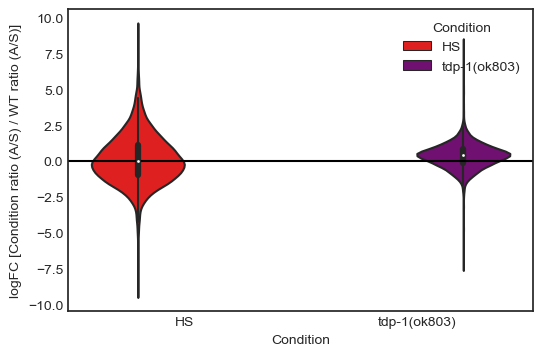

In [98]:
df_HS["HS % / WT % "] = df_HS["HS % Antisense over Sense"] / df_HS["WT % Antisense over Sense"]
df_OK["OK % / WT % "] = df_OK["OK % Antisense over Sense"] / df_OK["WT % Antisense over Sense"]



df_HS_UP =  df_HS[ df_HS["HS % / WT % "] > 1]
df_HS_DO = df_HS[ df_HS["HS % / WT % "] < 1]
df_OK_UP =  df_OK[ df_OK["OK % / WT % "] > 1]
df_OK_DO = df_OK[ df_OK["OK % / WT % "] < 1]
print("length of df_HS_UP is : ", len(df_HS_UP))
print("length of df_HS_DO is : ", len(df_HS_DO))
print("length of df_OK_UP is : ", len(df_OK_UP))
print("length of df_OK_DO is : ", len(df_OK_DO))

# sns.boxplot(x="log HS % / WT % ", data=df_HS)
# sns.stripplot(x="log HS % / WT % ", data=df_HS,jitter=True, dodge=True)

df_HS["logFC [Condition ratio (A/S) / WT ratio (A/S)]"] = np.log(df_HS["HS % / WT % "])
df_OK["logFC [Condition ratio (A/S) / WT ratio (A/S)]"] = np.log(df_OK["OK % / WT % "])

df_HS["Condition (antisense/sense) / WT (antisense/sense) "] = df_HS["HS % / WT % "]
df_OK["Condition (antisense/sense) / WT (antisense/sense) "] = df_OK["OK % / WT % "]

df_HS["Condition"] = "HS"
df_OK["Condition"] = "tdp-1(ok803)" 

df_both = pd.concat([df_HS,df_OK])


df_antisense_up_in_condition =  df_both[df_both["logFC [Condition ratio (A/S) / WT ratio (A/S)]"] > 0 ]
df_antisense_do_in_condition =  df_both[df_both["logFC [Condition ratio (A/S) / WT ratio (A/S)]"] < 0 ]
# df_antisense_up_in_condition.to_csv("Antisense_up_in_condition.csv",sep="\t",index=None)

plt = sns.violinplot(palette=["Red","Purple"],x="Condition", y="logFC [Condition ratio (A/S) / WT ratio (A/S)]", data=df_both, hue="Condition")

# plt = sns.violinplot(palette=["Blue","Blue"],x="Condition", y="log Condition (antisense/sense) / WT (antisense/sense) ", data=df_antisense_up_in_condition[df_antisense_up_in_condition["log Condition (antisense/sense) / WT (antisense/sense) "]>0], cut=0)

plt.axhline(y=0, color='black', linestyle='-',)
# plt.legend_.remove()
fig = plt.get_figure()
# fig.savefig("Total_antisense_ratio_cutoff_"+ str(NUM) + "_mean_hued_log_violinplot.png",dpi=600,format="tiff")
df_both.head()

In [99]:
df_WTS = pd.DataFrame()
df_WTA = pd.DataFrame()
df_WTS["GeneID"] = df_OK["GeneID"]
df_WTA["GeneID"] = df_OK["GeneID"]
df_WTS["Count"] = df_OK["TOTAL_WT_S"]
df_WTA["Count"] = df_OK["TOTAL_WT_A"]


df_WTS["Condition"] = "WT"
df_WTS["Strand"] = "Sense"
df_WTA["Condition"] = "WT"
df_WTA["Strand"] = "Antisense"

df_WT = pd.concat([df_WTS,df_WTA])
# df_WT



df_OKS = pd.DataFrame()
df_OKA = pd.DataFrame()
df_OKS["GeneID"] = df_OK["GeneID"]
df_OKS["Condition"] = df_OK["Condition"]
df_OKA["Condition"] = df_OK["Condition"]
df_OKS["Strand"] = "Sense"
df_OKA["Strand"] = "Antisense"
df_OKS["Counts (Condition / WT)" ] = df_OK["TOTAL_OK_S"] / df_OK["TOTAL_WT_S"]
df_OKA["GeneID"] = df_OK["GeneID"]
df_OKA["Counts (Condition / WT)" ] = df_OK["TOTAL_OK_A"] / df_OK["TOTAL_WT_A"]
df_OK_ALL = pd.concat([df_OKS,df_OKA]) 


df_OKS = pd.DataFrame()
df_OKA = pd.DataFrame()
df_OKS["GeneID"] = df_OK["GeneID"]
df_OKS["Condition"] = df_OK["Condition"]
df_OKA["Condition"] = df_OK["Condition"]
df_OKS["Strand"] = "Sense"
df_OKA["Strand"] = "Antisense"
df_OKS["Counts (Condition / WT)" ] = df_OK["TOTAL_OK_S"] / df_OK["TOTAL_WT_S"]
df_OKA["GeneID"] = df_OK["GeneID"]
df_OKA["Counts (Condition / WT)" ] = df_OK["TOTAL_OK_A"] / df_OK["TOTAL_WT_A"]
df_OK_ALL = pd.concat([df_OKS,df_OKA]) 


df_HSS = pd.DataFrame()
df_HSA = pd.DataFrame()
df_HSS["GeneID"] = df_HS["GeneID"]
df_HSS["Condition"] = df_HS["Condition"]
df_HSA["Condition"] = df_HS["Condition"]
df_HSS["Strand"] = "Sense"
df_HSA["Strand"] = "Antisense"

df_HSS["Counts (Condition / WT)"] = df_HS["TOTAL_HS_S"] / df_HS["TOTAL_WT_S"]
df_HSA["GeneID"] = df_HS["GeneID"]
df_HSA["Counts (Condition / WT)"] = df_HS["TOTAL_HS_A"] / df_HS["TOTAL_WT_A"]

df_HS_ALL = pd.concat([df_HSS,df_HSA]) 

df_ALL = pd.concat([df_OK_ALL,df_HS_ALL])
df_ALL["logFC (Condition / WT)"] = np.log(df_ALL["Counts (Condition / WT)"])


df_ALL = df_ALL.sort_values(by="Counts (Condition / WT)", ascending=True)
df_ALL.head()

df_ALL_UP = df_ALL[df_ALL["logFC (Condition / WT)"]>0]
df_ALL_UP_A = df_ALL_UP[df_ALL_UP["Strand"]=="Antisense"]
df_ALL_UP_S = df_ALL_UP[df_ALL_UP["Strand"]=="Sense"]
df_ALL_UP_A_OK = df_ALL_UP_A[df_ALL_UP_A["Condition"] == "tdp-1(ok803)"]
df_ALL_UP_A_HS = df_ALL_UP_A[df_ALL_UP_A["Condition"] == "HS"]
df_ALL_UP_S_OK = df_ALL_UP_A[df_ALL_UP_A["Condition"] == "tdp-1(ok803)"]
df_ALL_UP_S_HS = df_ALL_UP_A[df_ALL_UP_A["Condition"] == "HS"]


df_ALL_DO = df_ALL[df_ALL["logFC (Condition / WT)"]<0]
df_ALL_DO_A = df_ALL_DO[df_ALL_DO["Strand"]=="Antisense"]
df_ALL_DO_S = df_ALL_DO[df_ALL_DO["Strand"]=="Sense"]
df_ALL_DO_A_OK = df_ALL_DO_A[df_ALL_DO_A["Condition"] == "tdp-1(ok803)"]
df_ALL_DO_A_HS = df_ALL_DO_A[df_ALL_DO_A["Condition"] == "HS"]
df_ALL_DO_S_OK = df_ALL_DO_A[df_ALL_DO_A["Condition"] == "tdp-1(ok803)"]
df_ALL_DO_S_HS = df_ALL_DO_A[df_ALL_DO_A["Condition"] == "HS"]

print("Length of df_ALL_UP_A_OK is", len(df_ALL_UP_A_OK))
print("Length of df_ALL_UP_A_HS is", len(df_ALL_UP_A_HS))
print("Length of df_ALL_UP_S_OK is", len(df_ALL_UP_S_OK))
print("Length of df_ALL_UP_S_HS is", len(df_ALL_UP_S_HS))
print("Length of df_ALL_DO_A_OK is", len(df_ALL_DO_A_OK))
print("Length of df_ALL_DO_A_HS is", len(df_ALL_DO_A_HS))
print("Length of df_ALL_DO_S_OK is", len(df_ALL_DO_S_OK))
print("Length of df_ALL_DO_S_HS is", len(df_ALL_DO_S_HS))

df_ALL.head()

Length of df_ALL_UP_A_OK is 3301
Length of df_ALL_UP_A_HS is 3679
Length of df_ALL_UP_S_OK is 3301
Length of df_ALL_UP_S_HS is 3679
Length of df_ALL_DO_A_OK is 5763
Length of df_ALL_DO_A_HS is 6099
Length of df_ALL_DO_S_OK is 5763
Length of df_ALL_DO_S_HS is 6099


,Condition,Counts (Condition / WT),GeneID,Strand,logFC (Condition / WT)
GeneID,,,,,
WBGene00045119,tdp-1(ok803),0.000065,WBGene00045119,Sense,-9.641343
WBGene00194828,tdp-1(ok803),0.000099,WBGene00194828,Sense,-9.220885
WBGene00045127,tdp-1(ok803),0.000118,WBGene00045127,Sense,-9.046055
WBGene00014426,HS,0.000321,WBGene00014426,Sense,-8.045588
WBGene00044973,tdp-1(ok803),0.000597,WBGene00044973,Sense,-7.422971


Populating the interactive namespace from numpy and matplotlib


/Users/M/anaconda3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'axes', 'plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
/Users/M/anaconda3/lib/python3.5/site-packages/seaborn/categorical.py:647: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
/Users/M/anaconda3/lib/python3.5/site-packages/seaborn/categorical.py:942: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])


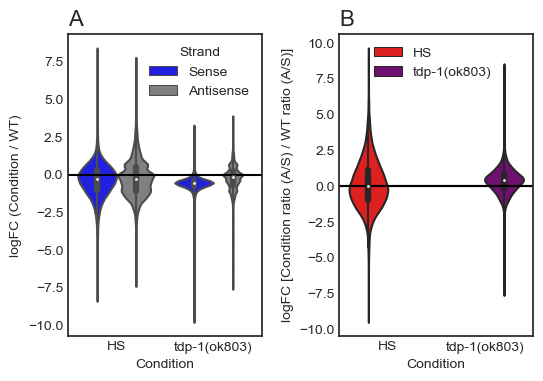

In [100]:
import seaborn as sns
import pandas as pd
%pylab inline
# plt.tight_layout(pad=1)

f, axes = plt.subplots(1, 2)
plt.axhline(y=0, color='black', linestyle='-')

sns.violinplot(palette=["Blue","Grey"],x="Condition", y="logFC (Condition / WT)",hue="Strand", data=df_ALL,  order=["HS", "tdp-1(ok803)"], ax=axes[0],orient='v')
axes[0].set_title("A",loc = 'left', fontsize = 16)
axes[0].axhline(y=0, color='black', linestyle='-')


sns.violinplot(palette=["Red","Purple"],x="Condition", y="logFC [Condition ratio (A/S) / WT ratio (A/S)]", data=df_both, hue="Condition",ax=axes[1], orient='v')
axes[1].set_title("B",loc = 'left', fontsize = 16)
axes[1].axhline(y=0, color='black', linestyle='-')
# axes[1].legend(loc='upper middle')
axes[1].legend(bbox_to_anchor=(.85, 1.0))

plt.subplots_adjust(wspace=0.4) # Move the right plot over more

plt.savefig("Total_antisense_ratio_cutoff_"+ str(NUM) + "_Final.png",dpi=600,format="tiff")

In [101]:
f1_names = "/Users/M/Google_Drive/Scripts/IGVfiles/worm/WS258/gene_name/WS258_WB_gene_names_unique.txt"
df_names = pd.read_csv(f1_names,sep="\t",names=["GeneID","Common_name"])
df_names.head()

,GeneID,Common_name
0,WBGene00000001,aap-1
1,WBGene00000002,aat-1
2,WBGene00000003,aat-2
3,WBGene00000004,aat-3
4,WBGene00000005,aat-4


In [102]:
#Write out two excel sheets

from pandas import ExcelWriter

def save_xls(list_dfs, xls_path):
    writer = ExcelWriter(xls_path)
    for n, df in enumerate(list_dfs):
        df = pd.merge(df,df_names,on="GeneID")
        df.to_excel(writer,'sheet%s' % n)
    writer.save()

save_xls([df_ALL,df_both, df_raw_counts],"Fig3_new.xls")

In [ ]:
save_xls([df_ALL,df_both, df_raw_counts],"Fig3_new.xls")